**Imports**

In [164]:
!pip install statsmodels

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date
import pickle
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Load Data**

In [166]:
boulderfiretweet= "/content/gdrive/MyDrive/Natural Disaster Alert System/boulder_fire_tweets.csv"
pred_bf = pd.read_csv(boulderfiretweet)
pred_bf.head()

,ImberJane,2022-03-28 22:56:22+00:00,RT @oliviaprentzel: Mandatory evacuation orders were issued for a wildfire just east of Estes Park... two days after the #NCAR fire sparked…,1508578772563501058
0,boulder_fire,2022-03-28 22:55:38+00:00,RT @BoulderOEM: Containment of #NCARFire is cu...,1508578590010621955
1,RachelAnneLevy,2022-03-28 22:47:19+00:00,Climate change is dangerous and costly. \n\nWe...,1508576497744891908
2,Boulderchick,2022-03-28 22:45:07+00:00,No more Fire!! #Boulder this up near Estes ht...,1508575942947467264
3,KhalaCompany,2022-03-28 22:40:19+00:00,"RT @rmpbs: ""The concern is that any time there...",1508574735940128778
4,KhalaCompany,2022-03-28 22:39:29+00:00,RT @CUBoulderENVS: As we return from Spring Br...,1508574525851672588


**Rename Column**

In [167]:
pred_bf = pred_bf.rename(columns={"ImberJane": "name", "2022-03-28 22:56:22+00:00" : "date","RT @oliviaprentzel: Mandatory evacuation orders were issued for a wildfire just east of Estes Park... two days after the #NCAR fire sparked…": "text","1508578772563501058":"id"})

**Time Series**

In [168]:
pred_bf['date'] = pd.to_datetime(pred_bf['date'])
pred_bf.set_index('date', inplace = True)
pred_bf.sort_index(inplace = True)
pred_bf.head()

,name,text,id
date,,,
2022-03-26 21:54:27+00:00,FrstAmndmnt,RT @horsepepsi: #ncar #boulderfire View of the...,1507838417370943488
2022-03-26 21:54:28+00:00,elleallever,RT @JHansenWX: There's a #wildfire near Boulde...,1507838419103191043
2022-03-26 21:54:31+00:00,RyanColeChristy,@omarfguzman https://t.co/sWOlUAJvPZ\n\nBe saf...,1507838434462912518
2022-03-26 21:54:32+00:00,LisaD144,RT @CUBoulderPolice: We are evacuating CU Boul...,1507838438191501314
2022-03-26 21:54:37+00:00,clooneytunes,RT @HumaneBoulder: #NCARFire: The Humane Socie...,1507838458894630923


In [169]:
text_bf = pred_bf[['text']].resample('H').count()
final_bf = pd.concat([text_bf], axis=1)
final_bf.head()

,text
date,
2022-03-26 21:00:00+00:00,98
2022-03-26 22:00:00+00:00,704
2022-03-26 23:00:00+00:00,603
2022-03-27 00:00:00+00:00,478
2022-03-27 01:00:00+00:00,399


**Plot Time Series Data**

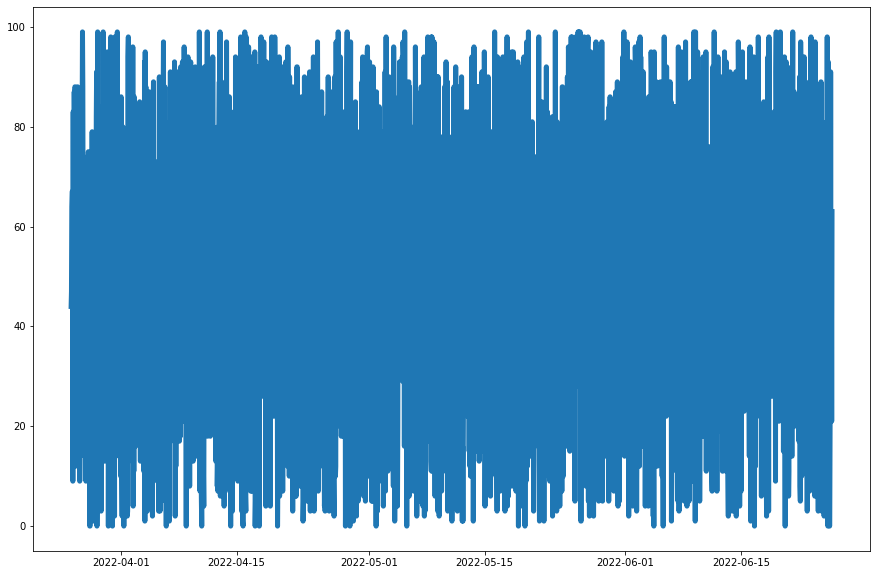

In [170]:
plt.figure(figsize = (15, 10))
np.random.seed(0)
hourly_bf = pd.DataFrame(index=pd.date_range('2022-03-26', '2022-06-26', freq='h'))

hourly_bf['text'] = np.random.randint(low=0, high=100, size=len(hourly_bf.index))

plt.plot(hourly_bf.index, hourly_bf.text, linewidth=5)